# **Loading and Preprocessing Loans Encoded Data**

In [73]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [74]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('insurance_claims.csv')

# Review the DataFrame
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [75]:
# Check for NaN values
nan_values = df.isna().sum()
print("NaN values:\n", nan_values)

# Check for "?" values
question_mark_values = (df == "?").sum()
print("\n\"?\" values:\n", question_mark_values)

NaN values:
 months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage

In [76]:
authorities_contacted_unique = df['authorities_contacted'].unique()
collision_type_unique = df['collision_type'].unique()
property_damage_unique = df['property_damage'].unique()
police_report_available_unique = df['police_report_available'].unique()

print("Unique values in 'authorities_contacted' column:", authorities_contacted_unique)
print("Unique values in 'collision_type' column:", collision_type_unique)
print("Unique values in 'property_damage' column:", property_damage_unique)
print("Unique values in 'police_report_available' column:", police_report_available_unique)


Unique values in 'authorities_contacted' column: ['Police' nan 'Fire' 'Other' 'Ambulance']
Unique values in 'collision_type' column: ['Side Collision' '?' 'Rear Collision' 'Front Collision']
Unique values in 'property_damage' column: ['YES' '?' 'NO']
Unique values in 'police_report_available' column: ['YES' '?' 'NO']



# **Handle missing values and "?"**

- Replace missing values in the authorities_contacted column with "Other".
- Replace "?" values in the collision_type column with "Other" if incident_severity is "Trivial Damage" or "Minor Damage".
- Replace "?" values in the police_report_available column with "YES" if authorities_contacted is "Police", "Ambulance", or "Fire", otherwise replace with "NO".
- Replace "?" values in the property_damage column with "YES" if property_claim exists, otherwise replace with "NO".


**These adjustments maintain the integrity of the entire dataset, which consists of 1000 entries.**

In [77]:
# Replace missing values in the authorities_contacted column with "Other"
df['authorities_contacted'].fillna('Other', inplace=True)

# Replace "?" values in the collision_type column with "Other" if incident_severity is "Trivial Damage" or "Minor Damage"
df.loc[(df['collision_type'] == '?') & (df['incident_severity'].isin(['Trivial Damage', 'Minor Damage'])), 'collision_type'] = 'Other'

# Replace "?" values in the police_report_available column with "YES" if authorities_contacted is "Police", "Ambulance", or "Fire", otherwise replace with "NO"
df.loc[(df['police_report_available'] == '?') & (df['authorities_contacted'].isin(['Police', 'Ambulance', 'Fire'])), 'police_report_available'] = 'YES'
df.loc[(df['police_report_available'] == '?') & ~(df['authorities_contacted'].isin(['Police', 'Ambulance', 'Fire'])), 'police_report_available'] = 'NO'

# Replace "?" values in the property_damage column with "YES" if property_claim exists, otherwise replace with "NO"
df.loc[(df['property_damage'] == '?') & (df['property_claim'] > 0), 'property_damage'] = 'YES'
df.loc[(df['property_damage'] == '?') & (df['property_claim'] == 0), 'property_damage'] = 'NO'


In [78]:
# Check for NaN values
nan_values = df.isna().sum()
print("NaN values:\n", nan_values)

# Check for "?" values
question_mark_values = (df == "?").sum()
print("\n\"?\" values:\n", question_mark_values)

NaN values:
 months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage

In [79]:
# Check the total number of entries and data types of the DataFrame
print("Total number of entries:", len(df))
print("\nData types of the DataFrame:")
print(df.dtypes)


Total number of entries: 1000

Data types of the DataFrame:
months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
inci

In [80]:
clean_df = df.copy

In [81]:
# List of columns to drop
columns_to_drop = ['policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable',\
                   'umbrella_limit', 'insured_zip','insured_occupation', 'insured_hobbies','incident_date',\
                   'auto_make','auto_model', 'auto_year',  '_c39','incident_state', 'incident_city' ,'policy_number','incident_location'   ]

# Drop the specified columns
clean_df = df.drop(columns=columns_to_drop)

# Check the result
clean_df.columns

Index(['months_as_customer', 'age', 'policy_annual_premium', 'insured_sex',
       'insured_education_level', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported'],
      dtype='object')

In [82]:
clean_df.head()

,months_as_customer,age,policy_annual_premium,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1406.91,MALE,MD,husband,53300,0,Single Vehicle Collision,Side Collision,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,1197.22,MALE,MD,other-relative,0,0,Vehicle Theft,Other,...,1,YES,0,0,YES,5070,780,780,3510,Y
2,134,29,1413.14,FEMALE,PhD,own-child,35100,0,Multi-vehicle Collision,Rear Collision,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,1415.74,FEMALE,PhD,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,...,1,YES,1,2,NO,63400,6340,6340,50720,Y
4,228,44,1583.91,MALE,Associate,unmarried,66000,-46000,Vehicle Theft,Other,...,1,NO,0,1,NO,6500,1300,650,4550,N


# **Separate the features X from the target y**

In [83]:
# Separate the features, X, from the target variable, y
y = clean_df['fraud_reported']
X = clean_df.drop(columns='fraud_reported', axis=1)
# Preview the features data
X.head()

,months_as_customer,age,policy_annual_premium,insured_sex,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1406.91,MALE,MD,husband,53300,0,Single Vehicle Collision,Side Collision,...,5,1,YES,1,2,YES,71610,6510,13020,52080
1,228,42,1197.22,MALE,MD,other-relative,0,0,Vehicle Theft,Other,...,8,1,YES,0,0,YES,5070,780,780,3510
2,134,29,1413.14,FEMALE,PhD,own-child,35100,0,Multi-vehicle Collision,Rear Collision,...,7,3,NO,2,3,NO,34650,7700,3850,23100
3,256,41,1415.74,FEMALE,PhD,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,...,5,1,YES,1,2,NO,63400,6340,6340,50720
4,228,44,1583.91,MALE,Associate,unmarried,66000,-46000,Vehicle Theft,Other,...,20,1,NO,0,1,NO,6500,1300,650,4550


In [84]:
# Define target vector
y = clean_df['fraud_reported'].values.reshape(-1, 1)
y[:5]


array([['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N']], dtype=object)

In [85]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# **Encode the categorical variables from the features data using `get_dummies`**

In [86]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [87]:
X.columns

Index(['months_as_customer', 'age', 'policy_annual_premium', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_relationship_husband',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_unmarried', 'insured_relationship_wife',
       'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft',
       'collision_type_F

In [88]:
# Review the features data
X.head()

,months_as_customer,age,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,...,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,48,1406.91,53300,0,5,1,1,2,71610,...,False,False,False,False,False,True,False,True,False,True
1,228,42,1197.22,0,0,8,1,0,0,5070,...,False,False,False,False,False,True,False,True,False,True
2,134,29,1413.14,35100,0,7,3,2,3,34650,...,False,False,False,False,False,True,True,False,True,False
3,256,41,1415.74,48900,-62400,5,1,1,2,63400,...,False,False,False,False,False,True,False,True,True,False
4,228,44,1583.91,66000,-46000,20,1,0,1,6500,...,False,False,False,False,True,False,True,False,True,False


In [89]:
X.columns

Index(['months_as_customer', 'age', 'policy_annual_premium', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_relationship_husband',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_unmarried', 'insured_relationship_wife',
       'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft',
       'collision_type_F

In [90]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [91]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [92]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [93]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# **Fit the Support Vector Machine linear classifier and make predictions**

In [94]:
# Support vector machine linear classifier
from sklearn.svm import SVC

# Create the SVC model
svc_model = SVC(kernel='linear')

# Train the model
svc_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svc = svc_model.predict(X_test_scaled)

# Model evaluation
print("SVC Model Evaluation:")
print(f"Test Accuracy: {svc_model.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred_svc))


SVC Model Evaluation:
Test Accuracy: 0.776
              precision    recall  f1-score   support

           N       0.85      0.84      0.85       184
           Y       0.57      0.59      0.58        66

    accuracy                           0.78       250
   macro avg       0.71      0.72      0.71       250
weighted avg       0.78      0.78      0.78       250



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Analysis**

The SVC model achieves an overall accuracy of 77.6%, indicating reasonable performance. However, when assessing fraud detection (class 'Y'), the model's precision, recall, and F1-score are relatively low (0.57, 0.59, and 0.58, respectively). This suggests that the model's ability to accurately identify fraud cases is limited. While the overall accuracy is acceptable, the model's performance in detecting fraud is not satisfactory. Therefore, it's important to exercise caution when relying solely on this model for fraud detection. Further optimization or exploration of other models may be necessary to improve fraud detection accuracy.

# **Fit the K-Nearest Neighbors classifier and make predictions**

In [95]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training data
knn_model.fit(X_train_scaled, y_train)

# Create predictions using the testing data
y_pred = knn_model.predict(X_test_scaled)


# Model evaluation
print("KNN Model Evaluation:")
print('KNN Test Acc: %.3f' % knn_model.score(X_test_scaled, y_test))

# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))




/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Model Evaluation:
KNN Test Acc: 0.692
              precision    recall  f1-score   support

           N       0.77      0.82      0.80       184
           Y       0.40      0.33      0.36        66

    accuracy                           0.69       250
   macro avg       0.59      0.58      0.58       250
weighted avg       0.68      0.69      0.68       250



**Analysis**

The KNN model achieves an accuracy of 69.2%. However, when focusing on fraud detection (class 'Y'), the model's precision, recall, and F1-score are relatively low (0.40, 0.33, and 0.36, respectively). This indicates that the model's ability to correctly identify fraud cases is limited. While the overall accuracy is moderate, the model's performance in detecting fraud is not satisfactory. Therefore, it's important to use caution when relying solely on this model for fraud detection. Further optimization or exploration of other models might be necessary to improve fraud detection accuracy.

# **Fit the Random Forest classifier and make predictions**

In [64]:
# Import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fit the model and use .ravel() on the "y_train" data.
rf_model.fit(X_train_scaled, y_train.ravel())

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results

# Model evaluation
print("RandomForest Model Evaluation:")
print(f"RandomForest Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


RandomForest Model Evaluation:
RandomForest Accuracy Score : 0.76
Classification Report
              precision    recall  f1-score   support

           N       0.82      0.87      0.84       184
           Y       0.56      0.45      0.50        66

    accuracy                           0.76       250
   macro avg       0.69      0.66      0.67       250
weighted avg       0.75      0.76      0.75       250



**Analysis**

The Random Forest model achieves an accuracy score of 76%. However, when focusing on fraud detection (class 'Y'), the model's precision, recall, and F1-score are relatively low (0.56, 0.45, and 0.50, respectively). This indicates that the model's ability to correctly identify fraud cases is limited. While the overall accuracy is acceptable, the model's performance in detecting fraud is not satisfactory. Therefore, it's essential to use caution when relying solely on this model for fraud detection. Further optimization or exploration of other models might be necessary to improve fraud detection accuracy.

# **Feature Importance**

In [65]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.14742176225427986, 'incident_severity_Major Damage'),
 (0.06417443639703903, 'vehicle_claim'),
 (0.060010294041865295, 'property_claim'),
 (0.05939612610522867, 'total_claim_amount'),
 (0.05449811277282289, 'injury_claim'),
 (0.05379660181769255, 'policy_annual_premium'),
 (0.04988702990537107, 'months_as_customer'),
 (0.04501119176966976, 'incident_hour_of_the_day'),
 (0.04227877487489674, 'age'),
 (0.04089700351964353, 'incident_severity_Minor Damage')]

# **Fit the DecisionTree classifier and make predictions**:

In [66]:
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

# Import DecisionTreeClassifier from sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier instance
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = dt_model.predict(X_test_scaled)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results

# Model evaluation
print("DecisionTree Model Evaluation:")
print(f"DecisionTree Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


DecisionTree Model Evaluation:
DecisionTree Accuracy Score : 0.704
Classification Report
              precision    recall  f1-score   support

           N       0.80      0.80      0.80       184
           Y       0.44      0.42      0.43        66

    accuracy                           0.70       250
   macro avg       0.62      0.61      0.62       250
weighted avg       0.70      0.70      0.70       250



**Analysis**

The Decision Tree model achieves an accuracy score of 69.2%. However, when focusing on fraud detection (class 'Y'), the model's precision, recall, and F1-score are relatively low (0.42, 0.44, and 0.43, respectively). This indicates that the model's ability to correctly identify fraud cases is limited. While the overall accuracy is acceptable, the model's performance in detecting fraud is not satisfactory. Therefore, it's essential to use caution when relying solely on this model for fraud detection. Further optimization or exploration of other models might be necessary to improve fraud detection accuracy.

# **Visualizing the Decision Tree**

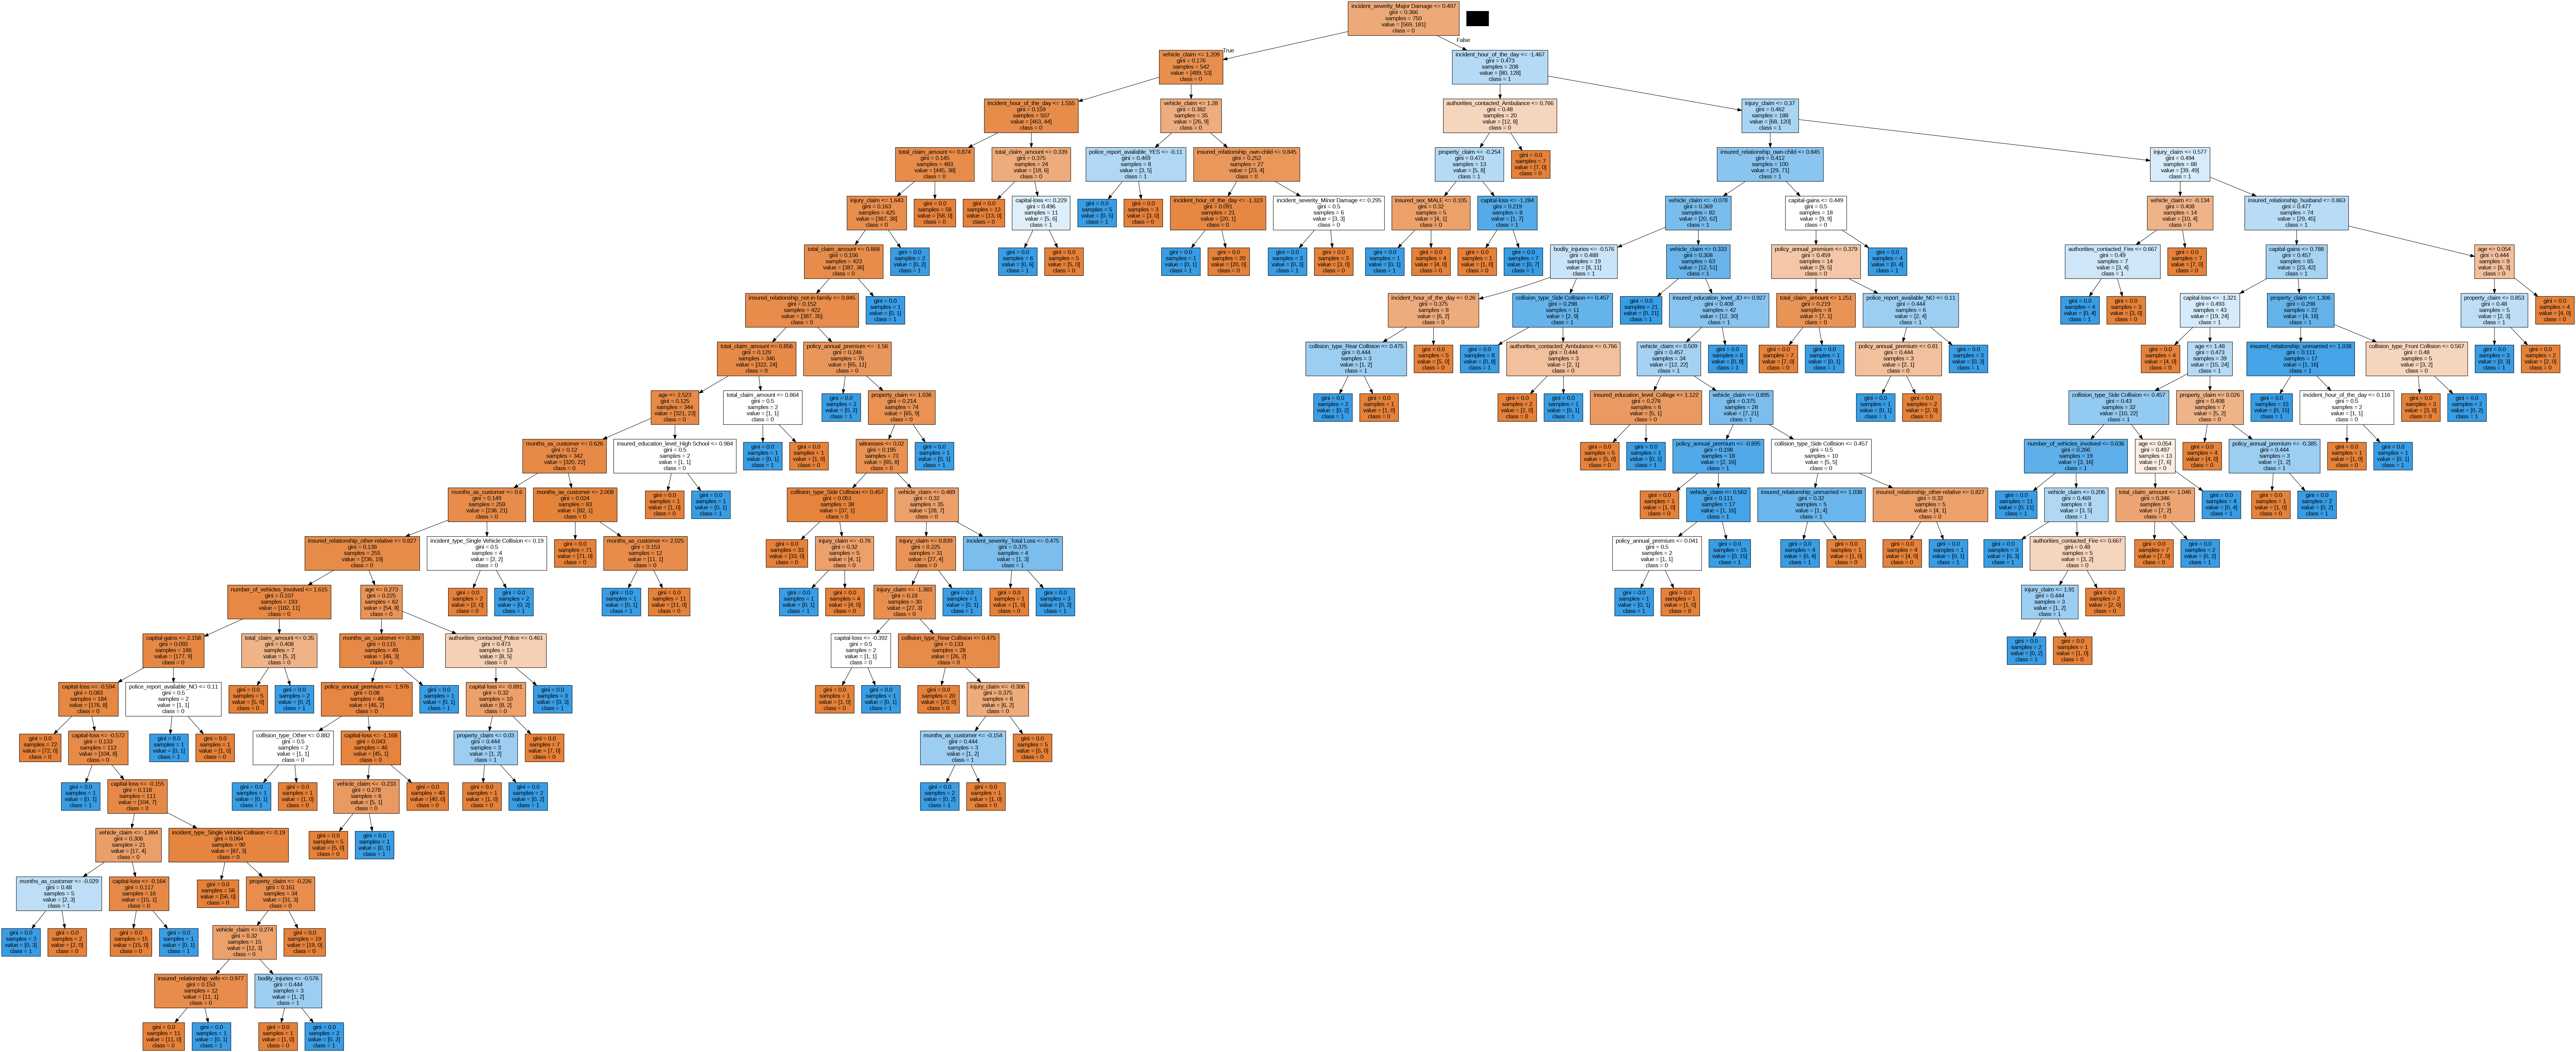

In [67]:
# Import necessary modules
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = export_graphviz(
    dt_model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [68]:
# Import necessary modules
import os

# Create directory if it doesn't exist
output_dir = "../Resources"
os.makedirs(output_dir, exist_ok=True)

# Saving the tree as PDF
file_path_pdf = "/content/transactions_tree.pdf"
graph.write_pdf(file_path_pdf)

# Saving the tree as PNG
file_path_png = "/content/transactions_tree.png"
graph.write_png(file_path_png)

True

Based on the evaluation results, the Support Vector Classifier and Random Forest Classifier perform relatively better compared to the other models.
Therefore, save these models.

In [69]:
import pickle

# Save the  model
with open('svc_model.pkl', 'wb') as f:
    pickle.dump(svc_model, f)

with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)


print("models are saved successfully!")


models are saved successfully!


In [72]:

import pickle

# Load the saved model
with open('svc_model.pkl', 'rb') as f:
    loaded_svc_model = pickle.load(f)

# Make predictions
predictions = loaded_svc_model.predict(X_train_scaled[:3])

print("Predictions:", predictions)

Predictions: ['N' 'N' 'Y']


In [ ]:
X_train_scaled[:10]

In [99]:
# Load the saved models
models = {}
model_files = ['svc_model.pkl', 'knn_model.pkl', 'rf_model.pkl', 'dt_model.pkl']

for filename in model_files:
    with open(filename, 'rb') as f:
        models[filename.split('.')[0]] = pickle.load(f)

# Make predictions for each model
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_train_scaled[:10])

# Print predictions for each model
for name, prediction in predictions.items():
    print(f"Predictions for {name}: {prediction}")


Predictions for svc_model: ['N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'N']
Predictions for knn_model: ['N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N']
Predictions for rf_model: ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N']
Predictions for dt_model: ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N']
